# Part B: Exporting HBV model inputs
# Introduction
This notebook contains the code used to export the model inputs for the HBV bucket-model simulations from the catchments from EStreams dataset used in the paper:  "Evaluating the E-OBS meteorological forcing data quality for large-sample hydrology studies in Europe" paper by Clerc-Schwarzenbach and do Nascimento et al. (in review). To be able to run this notebook, please ensure that you have downloaded the acompanying data of the paper. All links can be found in the data section of the paper.

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore', category=Warning)


# Configurations

In [ ]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."

# Set the directory:
os.chdir(PATH)

path_estreams = r'C:/Users/nascimth/Documents/data/EStreams'

# Import data

### - Network information

In [4]:
network_estreams = pd.read_csv(path_estreams+'/streamflow_gauges/estreams_gauging_stations.csv', encoding='utf-8')
network_estreams.set_index("basin_id", inplace = True)

# Convert 'date_column' and 'time_column' to datetime
network_estreams['start_date'] = pd.to_datetime(network_estreams['start_date'])
network_estreams['end_date'] = pd.to_datetime(network_estreams['end_date'])

network_estreams

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,420,...,9497,0.0,0.0,9497.0,0.0,B,['CH000197'],1,16,"['AT000001', 'CH000010', 'CH000046', 'CH000048..."
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,23103,0.0,0.0,23103.0,0.0,B,['CH000221'],1,1,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,13513,0.0,0.0,13513.0,0.0,B,['CH000215'],1,2,"['AT000002', 'AT000003', 'CH000221']"
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,1014,...,8765,0.0,0.0,8765.0,0.0,B,['CH000227'],1,1,['AT000004']
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,10957,0.0,0.0,10957.0,0.0,B,['CH000214'],1,3,"['AT000005', 'CH000214']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,NaN,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1988,1,['UAGR0017']
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,16,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1989,1,['UAGR0018']
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,307,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1990,1,['UAGR0019']


### - Shapefiles

In [47]:
catchment_boundaries = gpd.read_file(path_estreams+'\shapefiles\estreams_catchments.shp')
catchment_boundaries

,basin_id,gauge_id,country,area_offic,area_estre,area_flag,area_rel,start_date,end_date,gauge_flag,upstream,group,geometry
0,AT000001,200014,AT,4647.9,4668.379,0,-0.440608,1996-01-01,2021-12-31,B,16,1,"POLYGON Z ((9.69406 46.54322 0.00000, 9.69570 ..."
1,AT000002,200048,AT,102.0,102.287,0,-0.281373,1958-10-01,2021-12-31,B,1,1,"POLYGON Z ((10.13650 47.02949 0.00000, 10.1349..."
2,AT000003,231662,AT,535.2,536.299,0,-0.205344,1985-01-02,2021-12-31,B,2,1,"POLYGON Z ((10.11095 46.89437 0.00000, 10.1122..."
3,AT000004,200592,AT,66.6,66.286,0,0.471471,1998-01-02,2021-12-31,B,1,1,"POLYGON Z ((10.14189 47.09706 0.00000, 10.1404..."
4,AT000005,200097,AT,72.2,72.448,0,-0.343490,1990-01-01,2019-12-31,B,3,1,"POLYGON Z ((9.67851 47.06249 0.00000, 9.67888 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17125,UAGR0017,6682300,UA,321.0,325.370,0,-1.361371,1978-01-01,1987-12-31,B,1,1988,"POLYGON Z ((33.96791 44.63291 0.00000, 33.9679..."
17126,UAGR0018,6682500,UA,49.7,47.594,0,4.237425,1978-01-01,1987-12-31,B,1,1989,"POLYGON Z ((34.19958 44.58291 0.00000, 34.2029..."
17127,UAGR0019,6683010,UA,261.0,244.731,1,6.233333,1978-01-01,1987-12-31,B,1,1990,"POLYGON Z ((34.19624 44.88375 0.00000, 34.1962..."
17128,UAGR0020,6683200,UA,760.0,731.073,0,3.806184,1978-01-01,1987-12-31,B,1,1991,"POLYGON Z ((35.78708 47.28708 0.00000, 35.7870..."


### - Text with the filtered basins from Franziska

In [14]:
with open("data\catchment_list_3563.txt", "r") as file:
    catchment_list = [line.strip() for line in file]
catchment_list = catchment_list[1:]

# Computations

In [16]:
network_estreams_filtered = network_estreams.loc[catchment_list]

network_estreams_filtered

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,23103,0.0,0.0,23103.0,0.0,B,['CH000221'],1,1,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,13513,0.0,0.0,13513.0,0.0,B,['CH000215'],1,2,"['AT000002', 'AT000003', 'CH000221']"
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,10957,0.0,0.0,10957.0,0.0,B,['CH000214'],1,3,"['AT000005', 'CH000214']"
AT000006,200105,Garsella,AT,AT_EHYD,Lutz,9.875898,47.226658,9.875898,47.226658,730,...,21185,0.0,0.0,21185.0,0.0,B,['CH000218'],1,3,"['AT000006', 'CH000218']"
AT000007,231688,Beschling,AT,AT_EHYD,Ill,9.678850,47.200301,9.678850,47.200301,485,...,13514,0.0,0.0,13514.0,0.0,B,['CH000205'],1,8,"['AT000002', 'AT000003', 'AT000004', 'AT000005..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000252,257,MUNKEDAL 2,SE,SE_SMHI,ÖREKILSÄLVEN,11.683300,58.463600,11.683300,58.463600,NaN,...,41738,0.0,41282.0,0.0,456.0,A,NaN,1925,2,"['SE000143', 'SE000252']"
SE000277,364,HILLARED,SE,SE_SMHI,ÄTRAN,13.141300,57.607300,13.141300,57.607300,NaN,...,33460,0.0,33367.0,0.0,93.0,A,NaN,1886,1,['SE000277']
SE000283,654,ERSBO,SE,SE_SMHI,VÄSTERDALÄLVEN,13.011000,61.307600,13.011000,61.307600,NaN,...,40420,4.0,40390.0,0.0,249.0,A,NaN,1887,1,['SE000283']


In [17]:
network_estreams_filtered.groupby('gauge_country').size()

gauge_country
AT     460
CH     176
CZ     298
DE    1054
DK     139
ES     267
FR     528
GB     615
SE      26
dtype: int64

In [18]:
import tqdm as tqdm 
import pandas as pd
import os
import shutil
import zipfile

In [71]:
data

,p_mean,t_mean,t_min,t_max,sp_mean,rh_mean,ws_mean,swr_mean,pet_mean,q_mean
date,,,,,,,,,,
1950-01-01,0.00,-7.14,-11.34,-3.14,1026.58,54.81,NaN,68.64,0.26,NaN
1950-01-02,22.31,-3.37,-8.69,2.56,1020.95,59.44,NaN,57.97,0.42,NaN
1950-01-03,21.56,-2.62,-4.93,-0.27,1007.28,92.20,NaN,21.70,0.29,NaN
1950-01-04,37.41,-5.76,-5.99,-4.77,1006.48,90.60,NaN,21.70,0.12,NaN
1950-01-05,1.97,-3.32,-6.69,-0.26,1007.21,86.58,NaN,39.12,0.33,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-26,0.00,15.14,11.11,19.88,1015.70,64.09,2.27,291.33,3.80,NaN
2023-06-27,0.00,13.05,9.71,17.12,1016.54,76.35,3.11,185.67,3.27,NaN
2023-06-28,0.00,10.16,7.93,12.91,1017.34,78.04,2.41,159.09,2.42,NaN


In [73]:
# Dictionary to store NaN counts per basin_id
nan_counts_dict = {}

for basin_id in tqdm.tqdm(network_estreams_filtered.index):
    data = pd.read_csv(path_estreams+"\\data\estreams_timeseries_"+basin_id+".csv", index_col=0)

    #data["q_mean"] = timeseries_estreams[basin_id]
    #data.to_csv(r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Data\data"+"\estreams_timeseries_"+basin_id+".csv")

    output_folder = f"results\hbv\{basin_id}"  # Folder named after the basin_id
    txt_filename = os.path.join(output_folder, "ptq_estreams.txt")
    txt_filename_evap = os.path.join(output_folder, "evap_estreams.txt")

    zip_filename = f"results\hbv\{basin_id}.zip"

    # Create the output folder
    os.makedirs(output_folder, exist_ok=True)

    # Ensure the required columns exist
    required_columns = ["p_mean", "t_mean", "q_mean"]
    df_selected = data[required_columns].copy()

    df_selected.index = pd.to_datetime(df_selected.index)

    df_selected = df_selected.loc["1990-10-01":"2015-09-30"]

    # Format the date index to YYYYMMDD
    df_selected.insert(0, "date", df_selected.index.strftime("%Y%m%d"))

    df_selected.columns = ["Date", "P", "T", "Q"]

    df_pet = data["pet_mean"].copy()

    # Count NaN values in P and T
    nan_counts_dict[basin_id] = {
        "P": df_selected["P"].isna().sum(),
        "T": df_selected["T"].isna().sum(),
        "evap": df_pet.isna().sum(),
        "Q": df_selected["Q"].isna().sum()
        }
    
    # Convert it to mm/day
    area = network_estreams_filtered.loc[basin_id, "area_estreams"]

    df_selected["Q"] = df_selected.loc[:, "Q"]
    df_selected["Q"] = (df_selected.Q * 86400 * 1000) / (area * 1000000)
    df_selected.Q =  df_selected.Q.round(2)

    # Interpolate when needed:
    df_selected['P'] = df_selected['P'].fillna(method='ffill').fillna(method='bfill')
    df_selected['T'] = df_selected['T'].fillna(method='ffill').fillna(method='bfill')
    df_selected["Q"].fillna(-9999, inplace=True)
    
    ######################################### PET ##############################
    # Ensure datetime index
    df_pet.index = pd.to_datetime(df_pet.index)

    # Handle both Series or DataFrame
    if isinstance(df_pet, pd.Series):
        colname = df_pet.name or "pet"
        df_pet = df_pet.to_frame(name=colname)
    else:
        colname = df_pet.columns[0]

    # Compute long-term daily mean (climatology)
    climatology = df_pet.groupby(df_pet.index.dayofyear).mean()

    # Get the day-of-year for each row
    doys = df_pet.index.dayofyear

    # Replace NaNs with the climatology for that day
    mask = df_pet[colname].isna()
    df_pet.loc[mask, colname] = [climatology.loc[doy].values[0] for doy in doys[mask]]


    ############################################################################

    # Save the formatted data to ptq_estreams.txt (tab-separated, no header)
    df_selected.to_csv(txt_filename, sep="\t", header=True, index=False)


    #df_pet.index = pd.to_datetime(df_pet.index)
    
    # Convert Series to DataFrame and rename column
    #df_pet = df_pet.to_frame(name=f"basin.{basin_id}")    
    df_pet.columns = [f"basin.{basin_id}"]
    df_pet = df_pet.loc["1990-10-01":"2015-09-30"]

    df_pet.to_csv(txt_filename_evap, sep="\t", header=True, index=False)

    # Create a zip archive of the folder
    with zipfile.ZipFile(zip_filename, "w", zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(output_folder):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, output_folder))

    ## Remove the uncompressed folder after zipping (optional)
    shutil.rmtree(output_folder)

# Convert dictionary to DataFrame
nan_counts_df = pd.DataFrame.from_dict(nan_counts_dict, orient="index").reset_index()
nan_counts_df.rename(columns={"index": "basin_id"}, inplace=True)

nan_counts_df.to_csv(r"results\nan_counts_df.csv")

100%|██████████| 3563/3563 [13:51<00:00,  4.28it/s]


In [74]:
nan_counts_df.set_index("basin_id", inplace=True)

In [75]:
from datetime import datetime

start = datetime.strptime("01.10.1990", "%d.%m.%Y")
end = datetime.strptime("30.09.2015", "%d.%m.%Y")

num_days = (end - start).days + 1  # +1 to include both start and end dates
print(f"Number of days: {num_days}")

Number of days: 9131


In [52]:
nan_counts_df[["P_perc", "T_perc", "evap_perc"]] = 100*(nan_counts_df[["P", "T", "evap"]]/9131)

In [53]:
nan_counts_df[nan_counts_df["T"] > 0]

,P,T,evap,Q,P_perc,T_perc,evap_perc
basin_id,,,,,,,
GB000003,0,1,43,2129,0.0,0.010952,0.470923
GB000668,0,1,145,0,0.0,0.010952,1.587997
GB000671,0,1,42,0,0.0,0.010952,0.459972


<Axes: xlabel='basin_id'>

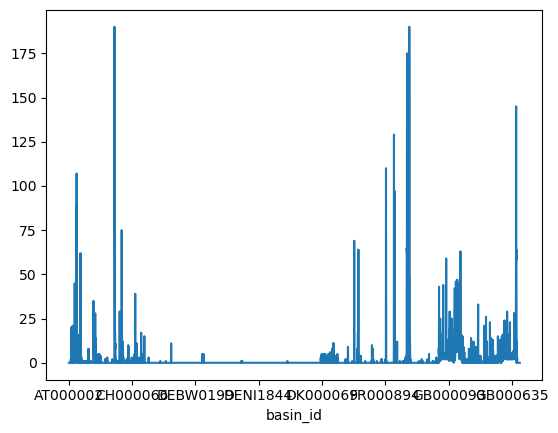

In [59]:
nan_counts_df.evap.plot()

In [54]:
nan_counts_df[nan_counts_df["P"] > 0]

,P,T,evap,Q,P_perc,T_perc,evap_perc
basin_id,,,,,,,


In [69]:
nan_counts_df[nan_counts_df["evap"] > 100]

,P,T,evap,Q,P_perc,T_perc,evap_perc
basin_id,,,,,,,
AT000083,0,0,107,2182,0.0,0.000000,1.171832
AT000466,0,0,190,0,0.0,0.000000,2.080824
FR000926,0,0,110,90,0.0,0.000000,1.204687
FR001502,0,0,129,0,0.0,0.000000,1.412770
FR002707,0,0,175,463,0.0,0.000000,1.916548
FR003138,0,0,190,12,0.0,0.000000,2.080824
FR003149,0,0,138,525,0.0,0.000000,1.511335
GB000668,0,1,145,0,0.0,0.010952,1.587997


<Axes: >

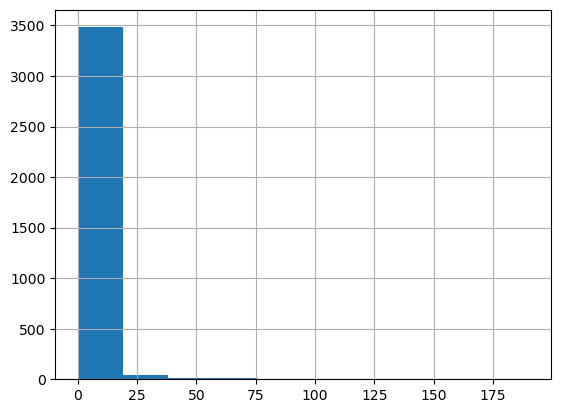

In [62]:
nan_counts_df["evap"].hist()

In [63]:
network_estreams_filtered.groupby('gauge_country').size()

gauge_country
AT     460
CH     176
CZ     298
DE    1054
DK     139
ES     267
FR     528
GB     615
SE      26
dtype: int64

In [64]:
catchment_boundaries.set_index("basin_id", inplace=True)
catchment_boundaries_filtered = catchment_boundaries.loc[catchment_list]
catchment_boundaries_filtered.to_file('results/estreams_catchments_clip_3563.shp')

# End